# Stoneburner, Kurt
- ## DSC 530 - Week 09

In [2]:
import json

#//*** Import preg dictionary, containing variable descriptions.
with open('preg_dict.json') as json_file: 
    preg_dict = json.load(json_file) 

    

#//*** Dictionary downloaded from the NSFG site:
#//*** ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NSFG/stata/2002FemPreg.dct
#//*** Dictionary is formatted for Stata. There were no current methods to import the version of Stata into Python (that I could find)
#//*** The file is text readable, so I wrote a parser to convert the file to a dictionary and export as JSON.
#//*** Considering the criteria for exercise 11-1 is limiting variables to those that would be known to co-workers
#//*** It is helpful to have a description of the variables.
'''
import re
import json

preg_dict = {}
f = open("2002FemPreg.dct","r")
for x in f:
    if "_column" in x:
        loop_line = re.sub ("...\%....",":",x[50:].strip()).split(":")
        preg_dict[ loop_line[0].lower() ] = loop_line[1]
f.close()

preg_string = json.dumps(preg_dict,indent=4)

print(f"{preg_string}")

f = open("preg_dict.json", "w")
f.write(preg_string)
f.close()
'''
"" 

''

In [3]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************
import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [4]:
# //*** Imports and Load Data
import nsfg
import thinkstats2
import thinkplot
import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [4]:
# //*** CODE HERE

- ## Chapter 11, Exercise 1

**Exercise:** Suppose one of your co-workers is expecting a baby and you are participating in an office pool to predict the date of birth. Assuming that bets are placed during the 30th week of pregnancy, what variables could you use to make the best prediction? You should limit yourself to variables that are known before the birth, and likely to be available to the people in the pool.

In [6]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]

8884 8884 8884
0        39.036241
1        38.977065
2        38.206495
3        38.749761
4        38.654221
           ...    
13581    39.105408
13584    39.018344
13588    38.866565
13591    38.846396
13592    38.809777
Length: 8884, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

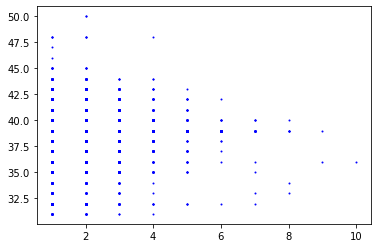

In [37]:
#print(f"{np.corrcoef(live.columns)}")
cor_val = []
index = []

#//*** Replace nan with 0's
live = live.replace(np.nan,0)

#//*** Correlate prglngth with each column
for col in live.columns:
    loop_val = np.corrcoef(live['prglngth'],live[col])[0][1]
    if math.isnan(loop_val) == False:
        #//*** Ignore any values under .01
        if abs(loop_val) > .01:
            cor_val.append(loop_val)
            index.append(col)

cors = pd.Series(index=index, data=cor_val).sort_values()
cor_pos = cors [ cors > 0 ]
neg_cors = cors [ cors < 0] 

#//*** Filter values based on the criteria of reasonably well known information
exclude_strings = [ "IMPUTATION FLAG",
                   "CYCLE 4 VERSION",
                   "CM FOR R'S MOST RECENT COMPLETED PREGNANCY",
                  "INFORMAL MARITAL STATUS",
                   "INFORMAL MARITAL STATUS AT PREGNANCY OUTCOME - 6 CATEGORIES",
                  "CM DATE OF CONCEPTION",
                   "CM FOR PREGNANCY END DATE (REGARDLESS OF OUTCOME)",
                  "WHETHER PREGNANCY ENDED BEFORE R'S 1ST MARRIAGE (PREMARITALLY)",
                  "WHETHER R RECEIVED PUBLIC ASSISTANCE IN 2001",
                   "EDUCATION (COMPLETED YEARS OF SCHOOLING)",
                   "BC-5 GESTATIONAL LENGTH OF PREGNANCY IN WEEKS",
                   "DURATION OF COMPLETED PREGNANCY IN WEEKS",
                   "LOW BIRTHWEIGHT - BABY 1",
                   "GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN MONTHS)",
                   "BC-1 HOW PREGNANCY ENDED - 1ST MENTION",
                   "BC-5 GESTATIONAL LENGTH OF PREGNANCY IN MONTHS",
                   "SCRAMBLED VERSION OF THE STRATUM",
                   "CM FOR R'S FIRST COMPLETED PREGNANCY",
                   "CM FOR R'S MOST RECENT LIVE BIRTH",    
                   "CM FOR DATE OF BEGINNING OF PREGNANCY INTERVAL",
                   "CM FOR BABY'S OR BABIES' DATE OF BIRTH (DELIVERY DATE)",
                   "CM FOR DATE OF END OF PREGNANCY INTERVAL",
                   "PREGNANCY ORDER (NUMBER)",
                   "EG-16 RIGHT BEF PREG, DID THE FATHER WANT R TO HAVE BABY AT ANY TIME IN FUTURE?",
                   "FORMAL MARITAL STATUS AT PREGNANCY OUTCOME",
                   "BH-1 WHETHER R BREASTFED THIS CHILD AT ALL - 2ND FROM THIS PREG",
                    "BD-2 SEX OF 2ND LIVEBORN BABY FROM THIS PREGNANCY",
                    "BG-7 IS R STILL LEGAL MOTHER OF CHILD - 2ND FROM THIS PREGNANCY" ,
                    "AGE (IN MOS) WHEN R'STOPPED NURSING CHILD - 2ND FROM THIS PREG" ,
                    "EG-5 REASON NOT USING/HAD STOPPED USING METHOD BEC. WANTED PREG?", 
                    "BG-2 WHETHER CHILD IS STILL ALIVE - 1ST FROM THIS PREGNANCY" ,
                    "BH-1 WHETHER R BREASTFED THIS CHILD AT ALL - 1ST FROM THIS PREG" ,
                    "BG-1 WHETHER CHILD LIVES WITH R - 2ND FROM THIS PREGNANCY" ,
                    "BG-1 WHETHER CHILD LIVES WITH R - 1ST FROM THIS PREGNANCY" ,
                    "AGE (IN MOS) WHEN 1ST SUPPLEMENTED - 2ND FROM THIS PREG" ,
                   "BH-2 HAS R BEGUN SUPPLEMENTATION FOR CHILD - 2ND FROM THIS PREG" ,
                    "CHECK ON WHETHER CHILD MATCHES BIO CHILD IN HH ROSTER - 1ST" ,
                    "EG-24 (UNINTENDED PREG) REASON DIDN'T USE METHOD - 2ND MENTION" ,
                    "BH-4 HAS R'STOPPED BREASTFEEDING CHILD - 2ND FROM THIS PREG" ,
                   "DURATION OF BREASTFEEDING IN WEEKS" ,
                   "BC-7 DK FOLLOWUP FOR GESTATIONAL LENGTH OF A LIVEBIRTH",
                   "CM FOR CHLD'S DATE OF DEATH - 1ST FROM THIS PREGNANCY", 
                    "CM FOR CHLD'S DATE OF DEATH - 3RD FROM THIS PREGNANCY", 
                    "EG-21 HOW HARD TRYING TO GET/AVOID PREGNANCY (0-10)", 
                    "BG-2 WHETHER CHILD IS STILL ALIVE - 3RD FROM THIS PREGNANCY" ,
                    "CM FOR DATE CHILD STOPPED LIVING W/R - 1ST FROM THIS PREGNANCY" ,
                    "BD-7 PLACE WHERE R GAVE BIRTH" ,
                    "EG-1 USE ANY METHOD IN PREGNANCY INTERVAL?" ,
                    "EG-24 (UNINTENDED PREG) REASON DIDN'T USE METHOD - 3RD MENTION" ,
                    "BG-2 WHETHER CHILD IS STILL ALIVE - 2ND FROM THIS PREGNANCY" ,
                    "PAYMENT FOR DELIVERY" ,
                    "WANTEDNESS OF PREGNANCY - RESPONDENT - CYCLE 5 VERSION" ,
                    "EG-6 RIGHT BEF PREG, WANT TO HAVE BABY AT ANY TIME IN FUTURE?" ,
                    "CM FOR DATE CHILD STOPPED LIVING W/R - 2ND FROM THIS PREGNANCY" ,
                    "BD-8 PAYMENT FOR DELIVERY - 2ND MENTION" ,
                    "EG-12B RIGHT BEF. PREG, THINK MIGHT EVER WANT TO HAVE BABY W/THAT PARTNER?" ,
                    "EG-22 HOW MUCH WANTED TO GET/AVOID PREGNANCY (0-10)" ,
                    "EG-23 (UNINTENDED PREG)" ,
                    "NUMBER OF WEEKS PREGNANT AT FIRST PRENATAL CARE" ,
                    "BG-7 IS R STILL LEGAL MOTHER OF CHILD - 1ST FROM THIS PREGNANCY" ,
                    "BG-6 LEGAL AGREEMENT FOR WHERE CHILD LIVES - 1ST FROM THIS PREG" ,
                    "BE-4 R'SMOKED AT ALL AFTER R KNEW SHE WAS PREGNANT" ,
                    "EG-8 VERIFY DIDN'T WANT BABY AT ANY TIME IN FUTURE" ,
                    "BD-8 PAYMENT FOR DELIVERY - 1ST MENTION",
                    "BG-5 WHERE CHILD LIVES NOW - 2ND FROM THIS PREGNANCY" ,
                    "CM FOR CHLD'S DATE OF DEATH - 2ND FROM THIS PREGNANCY" ,
                    "EG-7 PROBABLY WANT BABY AT ANY TIME OR NOT?" ,
                    "EG-18A WAS R LIVING W/FATHER OF PREG AT BEGINNING OF PREG" ,
                    "BG-1 WHETHER CHILD LIVES WITH R - 3RD FROM THIS PREGNANCY" ,
                    "BG-5 WHERE CHILD LIVES NOW - 1ST FROM THIS PREGNANCY" ,
                    "BF-4 WEEKS OF MATERNITY LEAVE TAKEN FOR THIS PREGNANCY", 
                    "BD-2 SEX OF 1ST LIVEBORN BABY FROM THIS PREGNANCY" ,
                    "AGE (IN MOS) WHEN CHILD LAST LIVED W/R-1ST FROM THIS PREGNANCY" ,
                    "AGE (IN MOS) WHEN CHILD LAST LIVED W/R - 2ND FROM THIS PREGNANCY", 
                    "EG-11 CHOOSE MONS OR YRS FOR HOW MUCH SOONER BECAME PREG THAN WANTED" ,
                    "EG-9 RIGHT BEFORE PREG, WANT TO HAVE BABY AT ANY TIME IN FUTURE? (2ND ASKING)" ,
                    "BD-4 IS BABY LOW BIRTHWEIGHT- 1ST BABY FROM THIS PREGNANCY" ,
                    "EG-12A RIGHT BEFORE PREG, WANT TO HAVE BABY WITH THAT PARTNER?" ,
                    "BH-5 AGE (MOS/WKS/DAY) WHEN STOPPED BREASTFEEDING - 1ST FROM THIS PREG" ,
                    "EG-4 METHOD(S) USING WHEN BECAME PREG - 1ST MENTION" ,
                   "BH-3 UNITS (MOS/WKS/DAYS) FOR FRSTEATD_N - 1ST FROM THIS PREG" ,
                   "EG-2 BEFORE YOU BECAME PREG, STOP USING ALL METHODS?" ,
                    "BH-5 UNITS (MOS/WKS/DAYS) FOR AGEQTNUR_N - 1ST FROM THIS PREG" ,
                    "GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN WEEKS)" ,
                   "OPEN INTERVAL",
                   "EG-20 WHEN DID R TELL FATHER OF PREG ABOUT PREGNANCY",
                   "BH-3 AGE (MOS/WKS/DAY) WHEN 1ST SUPPLEMENTED - 1ST FROM THIS PREG",
                   "AGE (IN MOS) WHEN R'STOPPED NURSING CHILD - 1ST FROM THIS PREG" 
                  ]

#fmarital  : "FORMAL MARITAL STATUS AT PREGNANCY OUTCOME" : [1. Married, 2. Divorced, 3. Widowed, 4. Separated, 5 Never Married]
#agecon : "AGE AT TIME OF CONCEPTION" : # / 100 = years old at conception
#religion : "Current religious affiliation " : 1. NO Religion 2. Catholic 3. Protestant 4. Other Religion
#metro : "PLACE OF RESIDENCE (METROPOLITAN / NONMETROPOLITAN)"  - MSA CENTRAL CITY, MSA OTHER, NOT MSA
#wantresp 1 LATER, OVERDUE, 2 RIGHT TIME, 3 TOO SOON, MISTIMED 4 DIDN'T CARE, INDIFFERENT, 5 UNWANTED 6 DON'T KNOW, NOT SURE
#laborfor : 1. Full time, 2. part time, 3. temp, 4 working maternity leave, 5, not working but looking, 6. school.
#           7. keeping house, 9. caring for family, 9. Other
#race: 1. black, 2. white, 3. other
#hieduc: 5. 9th grade, 6. 10th, 7. 11th, 8. 12th no Diploma, 9. High School, 10. Some College, 11. assoc degree, 12. bachelor 13 masters 14 phd, 15 professional
#hispanic : 1. Hispaning 2. non-hispanic
#poverty : # / 100 percaentage of poverty level
#multbrth 



preg_test = {}
preg_cols = []
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

for preg_key,preg_value in  cors.items():
    if preg_key in preg_dict.keys():
        loop_exclude = False
        for exclude in exclude_strings:
            if exclude in preg_dict[preg_key]:
                loop_exclude = True
        
        if not loop_exclude:
            #print(f"{round(preg_value,4)} {preg_key} : {preg_dict[preg_key]} ")
            preg_test[preg_key] = preg_dict[preg_key]
            preg_cols.append(preg_key)

            
#//*** Interesting and statistically significant.
#//*** We cannot justify asking about poverty level and how many babies were born alive
del preg_test["poverty"]
del preg_test["nbrnaliv"]
#'prglngth'            
#print(f"{preg_test.keys()}")

#X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
#Y = df['Stock_Index_Price']

theseColumns = [ 'nbrnaliv','birthord' ]
print(f"{len(live['prglngth'])} {len(live['nbrnaliv'])} {len(live['birthord'])}")

dependent = live['prglngth']
explanatory = live['nbrnaliv']
explanatory = live['birthord']
explanatory = live[ preg_cols ]

#df[['Interest_Rate','Unemployment_Rate']]

#print(f"{live[ [ 'nbrnaliv','birthord' ] ]}")
explanatory = sm.add_constant(explanatory) # adding a constant

model = sm.OLS(dependent, explanatory).fit()
predictions = model.predict(explanatory) 

print_model = model.summary()
#print(print_model)       
print(f"{model}")
print(f"{predictions}")

plt.scatter(live['birthord'],dependent,1, color="b")
#labels.append(loop_label)

#plt.legend(labels)
#plt.xlim(minVal,maxVal)

plt.show

#formula = 'prglngth ~ nbrnaliv '
#model = smf.ols(formula, data=live)
#results = model.fit()

#results.summary()
#print(f"{results.predict('prglngth')}")
#regr = LinearRegression()
#predict_Y = regr.predict(X_test) 

#for key in preg_test.keys():
    #loop_unique_values = [live [ live[key] == _ ][ ['prglngth', key] ] for _ in uniques ]
    #print(np.corrcoef(loop_unique_values.values[0]))
    # //*** I might be getting a little overly pythonic. Just because I can jam a bunch of stuff on one line
    # //*** Doesn't mean I should
    # //*** Unpack and correlate each value in the List
    #for loop_df in [live [ live[key] == _ ][ ['prglngth', key] ] for _ in uniques ]:
    #loop_intercept,loop_slope = regression_least_squares(live['prglngth'],live[key])

        
    
    
    
#np.corrcoef(live['prglngth'],live['nbrnaliv'].dropna())
    

The following are the only variables I found that have a statistically significant effect on pregnancy length.

In [7]:
import statsmodels.formula.api as smf
model = smf.ols('prglngth ~ birthord==1 + race==2 + nbrnaliv>1', data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prglngth   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.28
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           5.09e-22
Time:                        10:45:28   Log-Likelihood:                -18247.
No. Observations:                8884   AIC:                         3.650e+04
Df Residuals:                    8880   BIC:                         3.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                38.7617      0.039   1006.410      0.000      38.686      38.837
birthord == 1[T.True]     0.1015      0.040      2.528      0.011       0.023       0.180
race == 2[T.True]         0.1390      0.042      3.311      0.001       0.057       0.221
nbrnaliv > 1[T.True]     -1.4944      0.164     -9.086      0.000      -1.817      -1.172
==============================================================================
Omnibus:                     1587.470   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6160.751
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       6.707   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ## Chapter 11, Exercise 2

**Exercise:** The Trivers-Willard hypothesis suggests that for many mammals the sex ratio depends on “maternal condition”; that is, factors like the mother’s age, size, health, and social status. See https://en.wikipedia.org/wiki/Trivers-Willard_hypothesis

Some studies have shown this effect among humans, but results are mixed. In this chapter we tested some variables related to these factors, but didn’t find any with a statistically significant effect on sex ratio.

As an exercise, use a data mining approach to test the other variables in the pregnancy and respondent files. Can you find any factors with a substantial effect?



In [8]:
import regression
join = regression.JoinFemResp(live)

- ## Chapter 11, Exercise 3

**Exercise:** If the quantity you want to predict is a count, you can use Poisson regression, which is implemented in StatsModels with a function called `poisson`. It works the same way as `ols` and `logit`. As an exercise, let’s use it to predict how many children a woman has born; in the NSFG dataset, this variable is called `numbabes`.

Suppose you meet a woman who is 35 years old, black, and a college graduate whose annual household income exceeds $75,000. How many children would you predict she has born?



In [9]:
# //*** CODE HERE

Now we can predict the number of children for a woman who is 35 years old, black, and a college
graduate whose annual household income exceeds $75,000